In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
import itertools

In [2]:
df = pd.read_csv(filepath_or_buffer="https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data",sep="\t")
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
#missing values
print(df.isnull().sum())


AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

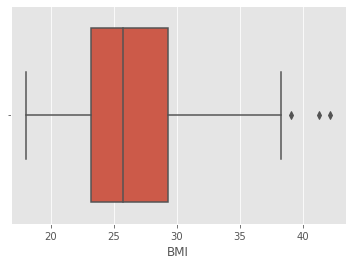

In [4]:
sns.boxplot(df['BMI'])

In [5]:
#outliers remove

for i in range(0,10):
    

    q1=df.iloc[:,i].quantile(.25)
    q3=df.iloc[:,i].quantile(.75)
    iqr=q3-q1
    low=q1-1.5*iqr
    high=q3+1.5*iqr

    df.iloc[:,i]=np.where(df.iloc[:,i]<low,low,df.iloc[:,i])
    df.iloc[:,i]=np.where(df.iloc[:,i]>high,high,df.iloc[:,i])

In [6]:
df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220


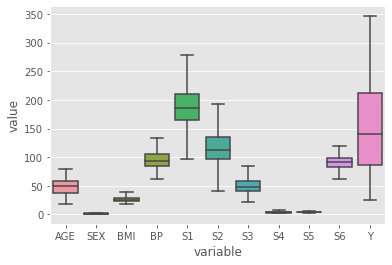

In [7]:
import seaborn as sns
sns.boxplot(x="variable",y="value",data=pd.melt(df))
plt.show()  

In [8]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.358965,94.647014,188.986425,115.213857,49.643665,4.067149,4.641183,91.228790,152.133484
std,13.109028,0.499561,4.365892,13.831283,34.172164,29.715466,12.476566,1.279829,0.521757,11.346132,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,61.125000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,38.387500,133.000000,278.000000,192.175000,84.000000,8.000000,6.077950,120.125000,346.000000


In [9]:
df.shape

(442, 11)

<AxesSubplot:>

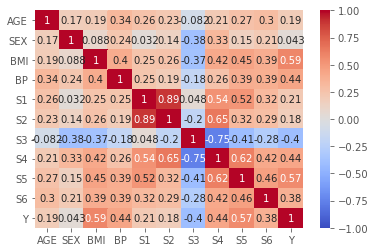

In [10]:
sns.heatmap(df.corr(), annot=True, vmin=-1 , vmax=1, cmap='coolwarm')

In [11]:
cols = list(df.columns)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Y"]), df["Y"], test_size=0.2, random_state=27)

In [13]:
norm = Normalizer()
X_train_normalized = norm.fit_transform(X_train)
X_test_normalized = norm.transform(X_test)

<h1>Question 1</h1>


AGE and Y:
Slope: [108.11721256]	Intercept: 130.98232549100354


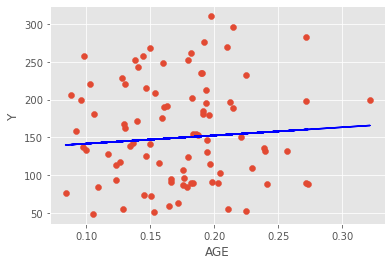

MSE: 4551.496224565266
R2: -0.014597569438919988

SEX and Y:
Slope: [-3194.41563383]	Intercept: 168.59996825198877


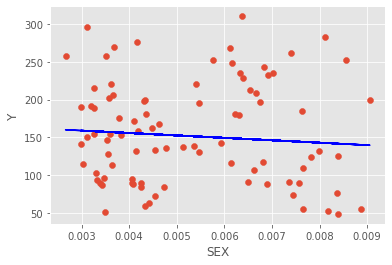

MSE: 4525.856483712258
R2: -0.008882082164624716

BMI and Y:
Slope: [1518.20965594]	Intercept: -0.8416269170124622


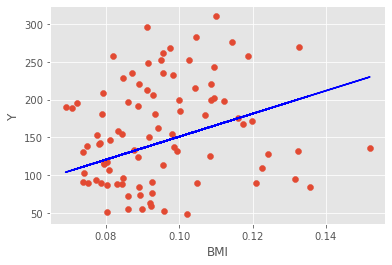

MSE: 4731.667192422656
R2: -0.05476041195320236

BP and Y:
Slope: [197.74202463]	Intercept: 80.01678131012532


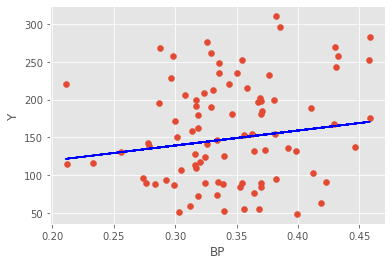

MSE: 4433.171772052835
R2: 0.011778746392424155

S1 and Y:
Slope: [-77.71853112]	Intercept: 204.76919237115567


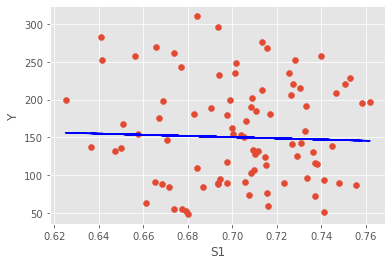

MSE: 4531.519160476633
R2: -0.010144378736605564

S2 and Y:
Slope: [67.95846833]	Intercept: 122.27659808562328


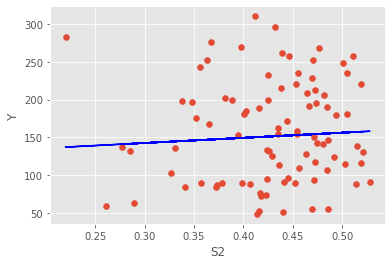

MSE: 4516.633783780518
R2: -0.0068262024115217645

S3 and Y:
Slope: [-710.55596412]	Intercept: 285.0893880969911


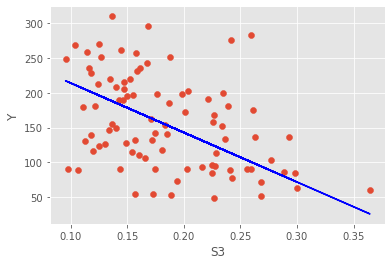

MSE: 3889.714005950932
R2: 0.13292372847627976

S4 and Y:
Slope: [8401.77723566]	Intercept: 24.686205985452574


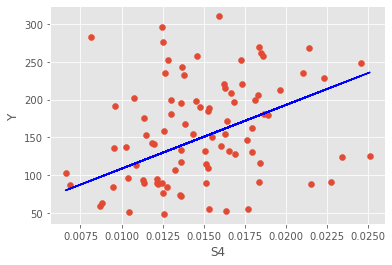

MSE: 4473.0575653966935
R2: 0.002887597859023483

S5 and Y:
Slope: [6088.78388039]	Intercept: 44.23796956275214


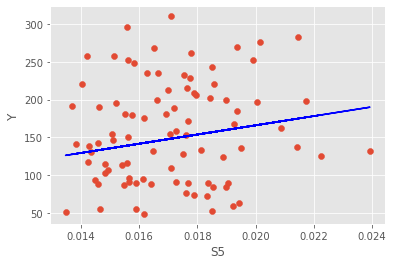

MSE: 4545.39132428571
R2: -0.013236694535437632

S6 and Y:
Slope: [71.49214762]	Intercept: 126.21037744125061


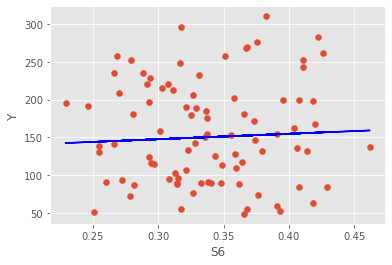

MSE: 4540.397604003706
R2: -0.012123518513620146


S3 having minimum mse should be used for the best prediction of Y


S3 having maximum r2_score should be used for the best prediction of Y


In [14]:
min_mse = 10e9
max_r2 = -10e9
for i in range(len(df.drop(columns=["Y"]).columns)):
    lr = LinearRegression()
    lr.fit(X_train_normalized[:,i].reshape(-1,1), y_train)
    print("\n{} and {}:\nSlope: {}\tIntercept: {}".format(cols[i], cols[-1], lr.coef_, lr.intercept_))
    y_pred = lr.predict(X_test_normalized[:,i].reshape(-1,1))
    plt.scatter(X_test_normalized[:,i].reshape(-1,1), y_test)
    plt.plot(X_test_normalized[:,i].ravel(), y_pred, color="b")
    plt.xlabel(cols[i])
    plt.ylabel("Y")
    plt.show()
    print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
    print("R2: {}".format(r2_score(y_test, y_pred)))
    
    min_mse = min(min_mse, mean_squared_error(y_test, y_pred))
    if min_mse == mean_squared_error(y_test, y_pred):
        min_feature = cols[i]
    
    max_r2 = max(max_r2, r2_score(y_test, y_pred))
    if max_r2 == r2_score(y_test, y_pred):
        max_feature = cols[i]
print("\n\n{} having minimum mse should be used for the best prediction of {}".format(min_feature, cols[-1]))

print("\n\n{} having maximum r2_score should be used for the best prediction of {}".format(max_feature, cols[-1]))

# Question 2


AGE, SEX and Y:
Slope: [  122.24307506 -4108.81933206]	Intercept: 152.38653011799153


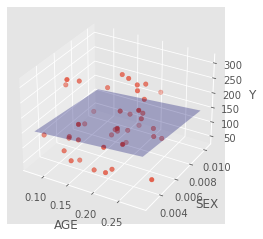

MSE: 6544.9103003261525
R2: -0.014389091601514581

AGE, BMI and Y:
Slope: [   2.47238852 1322.55424273]	Intercept: 20.271959321488623


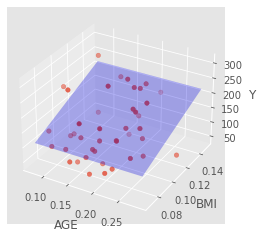

MSE: 5666.205150740978
R2: 0.12180053935933455

AGE, BP and Y:
Slope: [ 25.42928976 202.62531279]	Intercept: 75.16417388226166


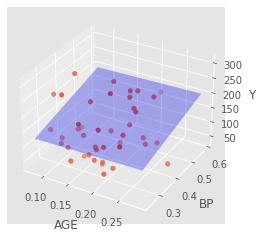

MSE: 6403.348425755724
R2: 0.007551441539749293

AGE, S1 and Y:
Slope: [ 65.74571192 -62.29891449]	Intercept: 183.40569902889948


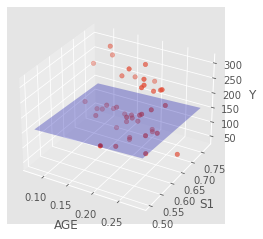

MSE: 6463.121879069897
R2: -0.0017127861160870506

AGE, S2 and Y:
Slope: [123.89546958  98.0764194 ]	Intercept: 88.34219676215098


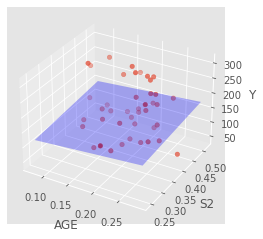

MSE: 6411.337116198776
R2: 0.006313282410019161

AGE, S3 and Y:
Slope: [  91.52350333 -646.01885507]	Intercept: 257.2766779758117


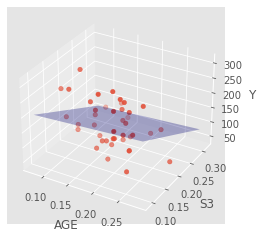

MSE: 4693.422369008693
R2: 0.27257116829184

AGE, S4 and Y:
Slope: [ 102.36950432 7382.13115801]	Intercept: 22.530503499285857


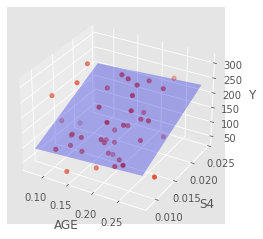

MSE: 5372.954981227686
R2: 0.16725108939204536

AGE, S5 and Y:
Slope: [  43.77694012 5061.49941469]	Intercept: 55.508082579434884


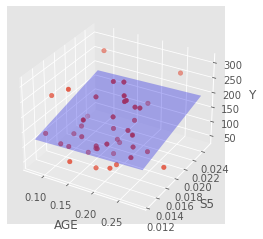

MSE: 6086.4758372266515
R2: 0.056663206633826735

AGE, S6 and Y:
Slope: [73.38370667 53.79054175]	Intercept: 120.19674788584152


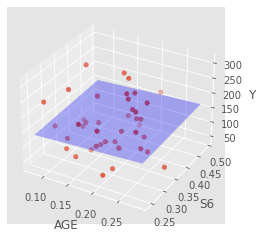

MSE: 6444.443127733238
R2: 0.001182214843620466

SEX, BMI and Y:
Slope: [-5972.96433408  1450.02881093]	Intercept: 40.920000379958964


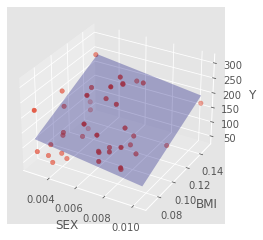

MSE: 5692.6101219879365
R2: 0.11770805931485906

SEX, BP and Y:
Slope: [-6163.52561012   283.25178539]	Intercept: 84.9516619541028


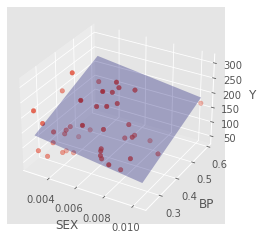

MSE: 6495.803070684094
R2: -0.0067780112685735805

SEX, S1 and Y:
Slope: [-5243.21726109  -235.54585265]	Intercept: 344.8039085346269


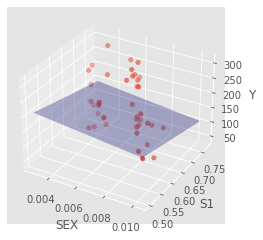

MSE: 6718.665131028643
R2: -0.04131917876694002

SEX, S2 and Y:
Slope: [-3325.18631107    56.13629998]	Intercept: 146.6363031452236


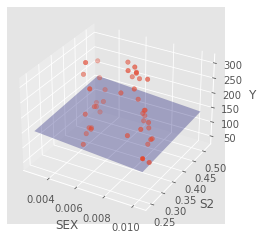

MSE: 6569.517166960423
R2: -0.018202885213178366

SEX, S3 and Y:
Slope: [-6191.99658334  -676.79621989]	Intercept: 313.69095956034624


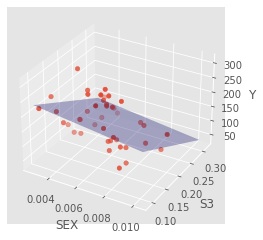

MSE: 4659.250305778663
R2: 0.27786746214270186

SEX, S4 and Y:
Slope: [-8430.67331424  8622.05545925]	Intercept: 68.78852227176472


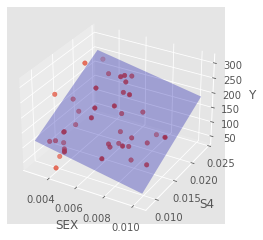

MSE: 5500.053947668874
R2: 0.14755214789465887

SEX, S5 and Y:
Slope: [-5670.98599725  6595.17795895]	Intercept: 67.80194726835397


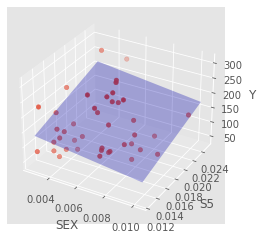

MSE: 6136.744821837989
R2: 0.04887206706189351

SEX, S6 and Y:
Slope: [-4463.30112456   126.96110324]	Intercept: 132.9396352175594


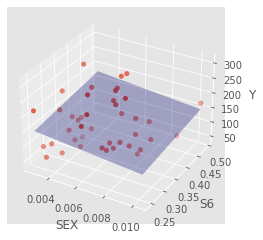

MSE: 6609.305604804894
R2: -0.02436965533977342

BMI, BP and Y:
Slope: [1328.20673137   -3.00866728]	Intercept: 21.229695051560014


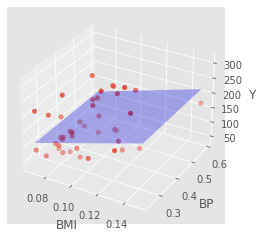

MSE: 5662.858492158098
R2: 0.12231923462084471

BMI, S1 and Y:
Slope: [1656.71207159  342.33153767]	Intercept: -250.87320854938346


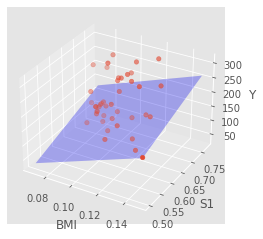

MSE: 5194.955750502265
R2: 0.19483901186553299

BMI, S2 and Y:
Slope: [1646.69220466  255.23868924]	Intercept: -118.52612735701283


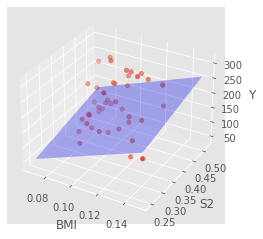

MSE: 5407.373757199595
R2: 0.16191655778044456

BMI, S3 and Y:
Slope: [1304.70653019 -641.51211057]	Intercept: 143.56646066927732


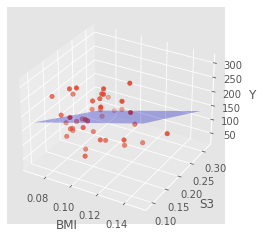

MSE: 4209.093058619287
R2: 0.3476368829705292

BMI, S4 and Y:
Slope: [1077.23153989 6478.61038467]	Intercept: -52.23556720993352


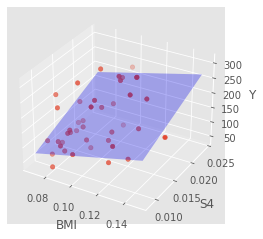

MSE: 4927.3277955061
R2: 0.23631840053526032

BMI, S5 and Y:
Slope: [1373.91564578 -698.62761616]	Intercept: 27.837020195743236


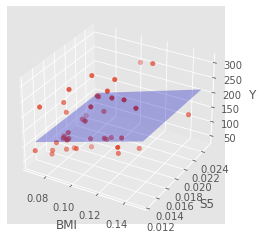

MSE: 5687.707143279223
R2: 0.11846796707375162

BMI, S6 and Y:
Slope: [1611.01315923 -219.06532648]	Intercept: 67.17918719422197


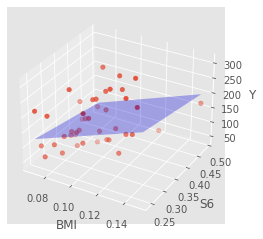

MSE: 5379.763167454002
R2: 0.16619589542839053

BP, S1 and Y:
Slope: [379.27887813 366.0381444 ]	Intercept: -238.08943171615337


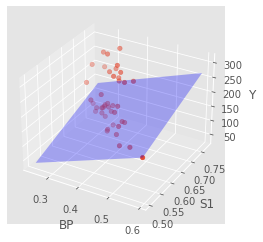

MSE: 6069.991304922461
R2: 0.05921812778357749

BP, S2 and Y:
Slope: [414.81330023 307.59163428]	Intercept: -124.84141485185827


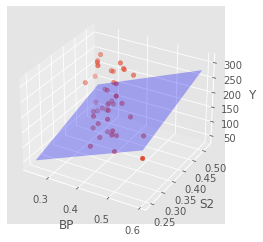

MSE: 6233.566037464767
R2: 0.033865843834890996

BP, S3 and Y:
Slope: [ 322.00250037 -697.08523754]	Intercept: 168.82777238195746


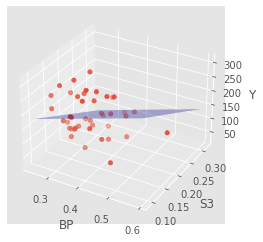

MSE: 4694.20443634719
R2: 0.2724499564584204

BP, S4 and Y:
Slope: [ 241.2882257  7563.97747428]	Intercept: -47.58854425338242


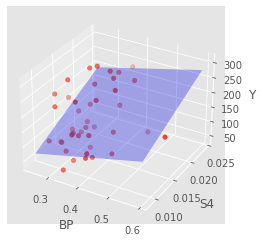

MSE: 5470.60792969177
R2: 0.15211595672571154

BP, S5 and Y:
Slope: [ 131.36629046 3618.02103238]	Intercept: 41.88936829446888


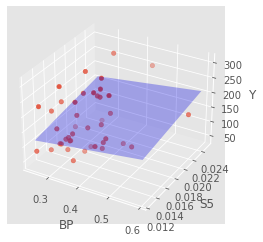

MSE: 6194.095415811665
R2: 0.03998335594833313

BP, S6 and Y:
Slope: [234.25629533 -61.18662957]	Intercept: 89.47086502368968


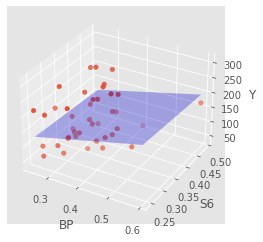

MSE: 6360.888799651931
R2: 0.014132216459005309

S1, S2 and Y:
Slope: [-184.39266023  112.00914846]	Intercept: 233.34439362177395


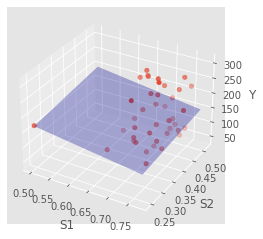

MSE: 6532.077684791711
R2: -0.012400177373888654

S1, S3 and Y:
Slope: [-183.52155167 -653.86463941]	Intercept: 403.14301188268837


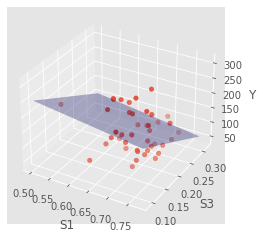

MSE: 4809.686622280024
R2: 0.25455148813583295

S1, S4 and Y:
Slope: [ -74.47273885 7326.55764872]	Intercept: 93.75591769827156


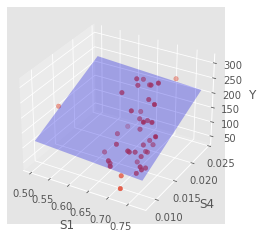

MSE: 5398.538979262377
R2: 0.16328585116339422

S1, S5 and Y:
Slope: [  25.03380766 5341.3567462 ]	Intercept: 41.09789922224503


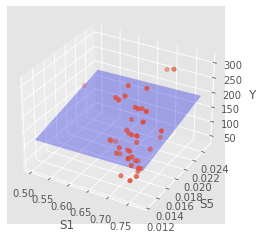

MSE: 6066.951288361399
R2: 0.059689296905280353

S1, S6 and Y:
Slope: [-65.0709202   37.27187709]	Intercept: 184.45647214819851


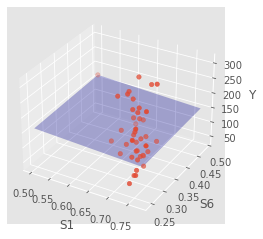

MSE: 6504.759468449889
R2: -0.008166154386931357

S2, S3 and Y:
Slope: [-519.75098654 -996.37235688]	Intercept: 558.0354975300315


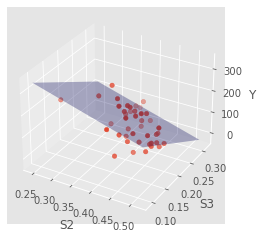

MSE: 4214.895310124239
R2: 0.3467375978217231

S2, S4 and Y:
Slope: [-153.09368328 8315.14244876]	Intercept: 91.27278189593802


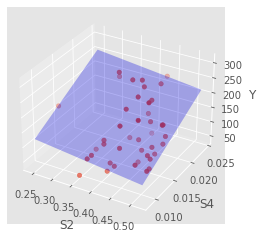

MSE: 5331.210403265966
R2: 0.17372103971600428

S2, S5 and Y:
Slope: [  360.51117161 11381.05879892]	Intercept: -198.30686319471604


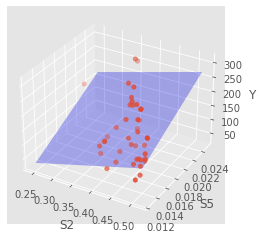

MSE: 5590.941693024909
R2: 0.13346554728153437

S2, S6 and Y:
Slope: [159.59884151 187.98663868]	Intercept: 20.518046323575533


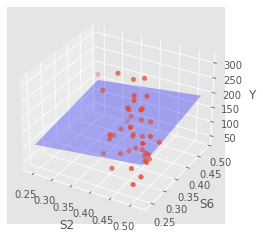

MSE: 6494.453371370947
R2: -0.006568822723983514

S3, S4 and Y:
Slope: [ -718.65396348 -1265.18550673]	Intercept: 306.54059554698


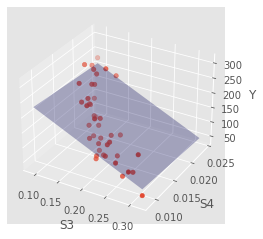

MSE: 4640.239513284547
R2: 0.2808139258288076

S3, S5 and Y:
Slope: [-670.79307773 6692.25170633]	Intercept: 161.52376814392835


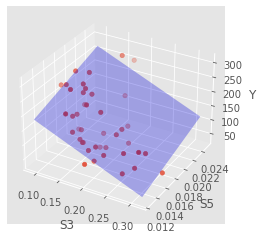

MSE: 4294.299089264305
R2: 0.33443088562925727

S3, S6 and Y:
Slope: [-671.16910779  190.64419229]	Intercept: 213.246483507562


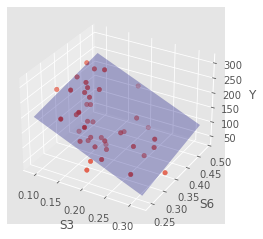

MSE: 4703.879225872549
R2: 0.27095047052083987

S4, S5 and Y:
Slope: [7004.22225363 2616.86444606]	Intercept: 0.9789608118204853


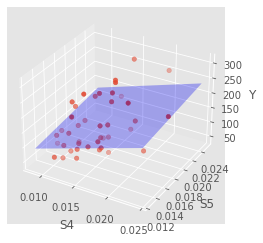

MSE: 5259.569999586338
R2: 0.1848245141222039

S4, S6 and Y:
Slope: [7324.40162463   43.6100442 ]	Intercept: 26.970269385452454


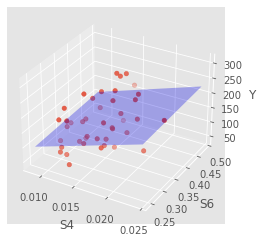

MSE: 5365.012155074872
R2: 0.1684821400613723

S5, S6 and Y:
Slope: [6772.29178057 -124.42538959]	Intercept: 76.16125405207474


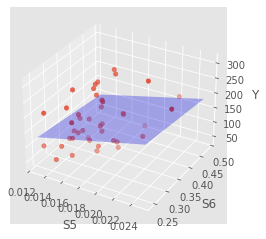

MSE: 5934.570630878715
R2: 0.08020684240667242


BMI and S3 having minimum mse should be used for the best prediction of Y


BMI and S3 having maximum r2_score should be used for the best prediction of Y


In [20]:
min_mse = 10e9
max_r2 = -10e9
for pair in itertools.combinations(df.drop(columns=["Y"]).columns, 2):
    lr = LinearRegression()
    lr.fit(X_train_normalized[:, [cols.index(pair[0]), cols.index(pair[1])]], y_train)
    print("\n{}, {} and {}:\nSlope: {}\tIntercept: {}".format(pair[0], pair[1], df.columns[-1], lr.coef_, lr.intercept_))
    y_pred = lr.predict(X_test_normalized[:, [cols.index(pair[0]), cols.index(pair[1])]])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_test_normalized[:, [cols.index(pair[0])]],
               X_test_normalized[:, [cols.index(pair[1])]],
               y_test)
    x_range = [X_test_normalized[:, [cols.index(pair[0])]].min(), X_test_normalized[:, [cols.index(pair[0])]].max()]
    y_range = [X_test_normalized[:, [cols.index(pair[1])]].min(), X_test_normalized[:, [cols.index(pair[1])]].max()]
    X, Y = np.meshgrid(x_range, y_range)
    Z = lr.coef_[0]*X + lr.coef_[1]*Y + lr.intercept_
    ax.plot_surface(X,Y,Z, alpha=0.3 , color='b')
    ax.set_xlabel(pair[0])
    ax.set_ylabel(pair[1])
    ax.set_zlabel("Y")
    plt.show()
    print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
    print("R2: {}".format(r2_score(y_test, y_pred)))
    
    min_mse = min(min_mse, mean_squared_error(y_test, y_pred))
    if min_mse == mean_squared_error(y_test, y_pred):
        min_feature1, min_feature2 = pair[0], pair[1]
    

    max_r2 = max(max_r2, r2_score(y_test, y_pred))
    if max_r2 == r2_score(y_test, y_pred):
        max_feature1, max_feature2 = pair[0], pair[1]
print("\n\n{} and {} having minimum mse should be used for the best prediction of {}".format(min_feature1, min_feature2, cols[-1]))
print("\n\n{} and {} having maximum r2_score should be used for the best prediction of {}".format(max_feature1, max_feature2, cols[-1]))

# Question 3

In [16]:
lr = LinearRegression()
lr.fit(X_train_normalized, y_train)
y_pred = lr.predict(X_test_normalized)
print("\nAll features({}) and {}:\nSlope: {}\nIntercept: {}".format(len(cols[:-1]), cols[-1], lr.coef_, lr.intercept_))
print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
print("R2: {}".format(r2_score(y_test, y_pred)))


All features(10) and Y:
Slope: [   54.9457566  -7725.67428976  1538.20124408   260.04021849
   694.01027414  -553.51759877 -1186.56128349 -2140.61049234
 -5288.90887989    18.69316942]
Intercept: 29.367156484973435
MSE: 3044.6773297609598
R2: 0.32129522555051515


# Question 4


Training set size: (20, 10)
Training MSE: 2486.155151120166
Validation MSE: 5373.658543948307

Training set size: (50, 10)
Training MSE: 3145.059832276429
Validation MSE: 4830.053065588235

Training set size: (100, 10)
Training MSE: 3401.441864776496
Validation MSE: 3907.525533864761

Training set size: (200, 10)
Training MSE: 3284.3489378761574
Validation MSE: 3351.248213741068

Training set size: (400, 10)
Training MSE: 3247.568116632965
Validation MSE: 3321.915262270229


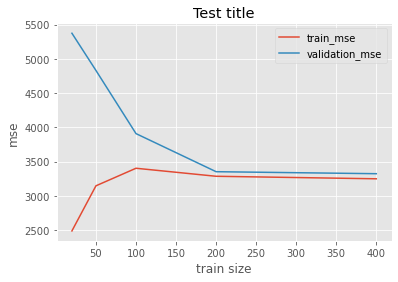

In [19]:
train_mse=[]
validation_mse = []
for i in [20, 50, 100, 200,400]:
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Y"]), df["Y"], 
                                                        train_size=i, random_state=42)
    norm = Normalizer()
    X_train_normalized = norm.fit_transform(X_train)
    X_test_normalized = norm.transform(X_test)
    lr = LinearRegression()
    lr.fit(X_train_normalized, y_train)
    print("\nTraining set size: {}".format(X_train_normalized.shape))
    print("Training MSE: {}".format(mean_squared_error(y_train, lr.predict(X_train_normalized))))
    print("Validation MSE: {}".format(mean_squared_error(y_test, lr.predict(X_test_normalized))))
    train_mse.append(mean_squared_error(y_train, lr.predict(X_train_normalized)))
    validation_mse.append(mean_squared_error(y_test, lr.predict(X_test_normalized)))
        
plt.plot([20, 50, 100, 200, 400],train_mse, label= "train_mse")
plt.plot([20, 50, 100, 200, 400],validation_mse, label= "validation_mse")
plt.xlabel("train size")
plt.ylabel("mse")
plt.legend()
plt.title("Test title")


plt.show()